In [1]:
import pickle
import GPy
import numpy as np
from had import HierAD
import matplotlib.pyplot as plt
import pylab as pb

In [2]:
f1 = open('d:/Flow','rb')
Flow = pickle.load(f1)
f1.close()
f2 = open('d:/Pressure','rb')
Pressure = pickle.load(f2)
f2.close()

# 매 10개 마다 평균값 취해서 데이터 만들기

Flow = Flow[:1676520]; Pressure = Pressure[:1676520]
Flow = np.mean(Flow.reshape(-1, 120), axis = 1); Pressure = np.mean(Pressure.reshape(-1, 120), axis = 1)
# Flow = Flow[::30]; Pressure = Pressure[::30]

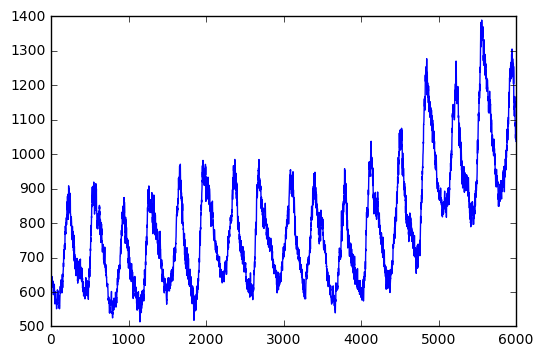

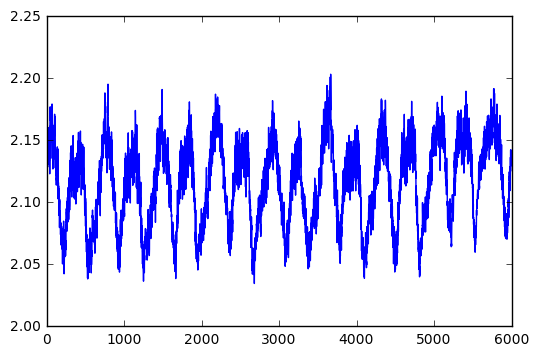

In [3]:
plt.plot(Flow[0:6000])
plt.show()
plt.plot(Pressure[0:6000])
plt.show()

In [11]:
obj = HierAD(Flow[:6000][:,None], Pressure[:6000][:,None], 'd:/Flow_Press')
# obj = HierAD(Flow[:200], Pressure[:200], 'd:/Flow_Press')


In [9]:
obj.training_save()

# f3 = open('d:/Flow_Press','rb')
# kern = pickle.load(f3)
# f3.close()
# kern[0]

 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\GPy\kern\src\periodic.py:100: RuntimeWarning:overflow encountered in true_divide
 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\GPy\kern\src\stationary.py:167: RuntimeWarning:overflow encountered in true_divide
 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\GPy\kern\src\rbf.py:43: RuntimeWarning:overflow encountered in square
 C:\Users\Woojin Cho\AppData\Local\Continuum\Anaconda3\lib\site-packages\GPy\util\linalg.py:60: RuntimeWarning:invalid value encountered in less_equal


In [12]:
results = obj.anomaly_detection(0,500,120,12)
plt.show()

1
[[ 2.17884812]
 [ 2.17712322]
 [ 2.176508  ]
 [ 2.17662599]
 [ 2.17717744]
 [ 2.1779465 ]
 [ 2.17879043]
 [ 2.17962225]
 [ 2.18039392]
 [ 2.18108296]
 [ 2.18168255]
 [ 2.18219481]
 [ 2.18262633]
 [ 2.18298536]
 [ 2.18328019]
 [ 2.18351835]
 [ 2.18370638]
 [ 2.18384989]
 [ 2.18395386]
 [ 2.18402297]
 [ 2.18406193]
 [ 2.18407576]
 [ 2.18407   ]
 [ 2.18405075]
 [ 2.18402472]
 [ 2.18399907]
 [ 2.18398138]
 [ 2.18397935]
 [ 2.18400067]
 [ 2.18405276]
 [ 2.18414256]
 [ 2.18427637]
 [ 2.18445962]
 [ 2.18469679]
 [ 2.18499125]
 [ 2.18534523]
 [ 2.18575978]
 [ 2.18623473]
 [ 2.18676876]
 [ 2.18735945]
 [ 2.18800329]
 [ 2.18869586]
 [ 2.18943186]
 [ 2.19020521]
 [ 2.19100923]
 [ 2.19183664]
 [ 2.19267978]
 [ 2.19353063]
 [ 2.19438095]
 [ 2.19522234]
 [ 2.1960464 ]
 [ 2.19684472]
 [ 2.19760905]
 [ 2.19833131]
 [ 2.19900372]
 [ 2.19961883]
 [ 2.20016962]
 [ 2.20064957]
 [ 2.20105271]
 [ 2.20137373]
 [ 2.20160801]
 [ 2.20175173]
 [ 2.2018019 ]
 [ 2.20175647]
 [ 2.20161436]
 [ 2.20137557]
 [ 2.201

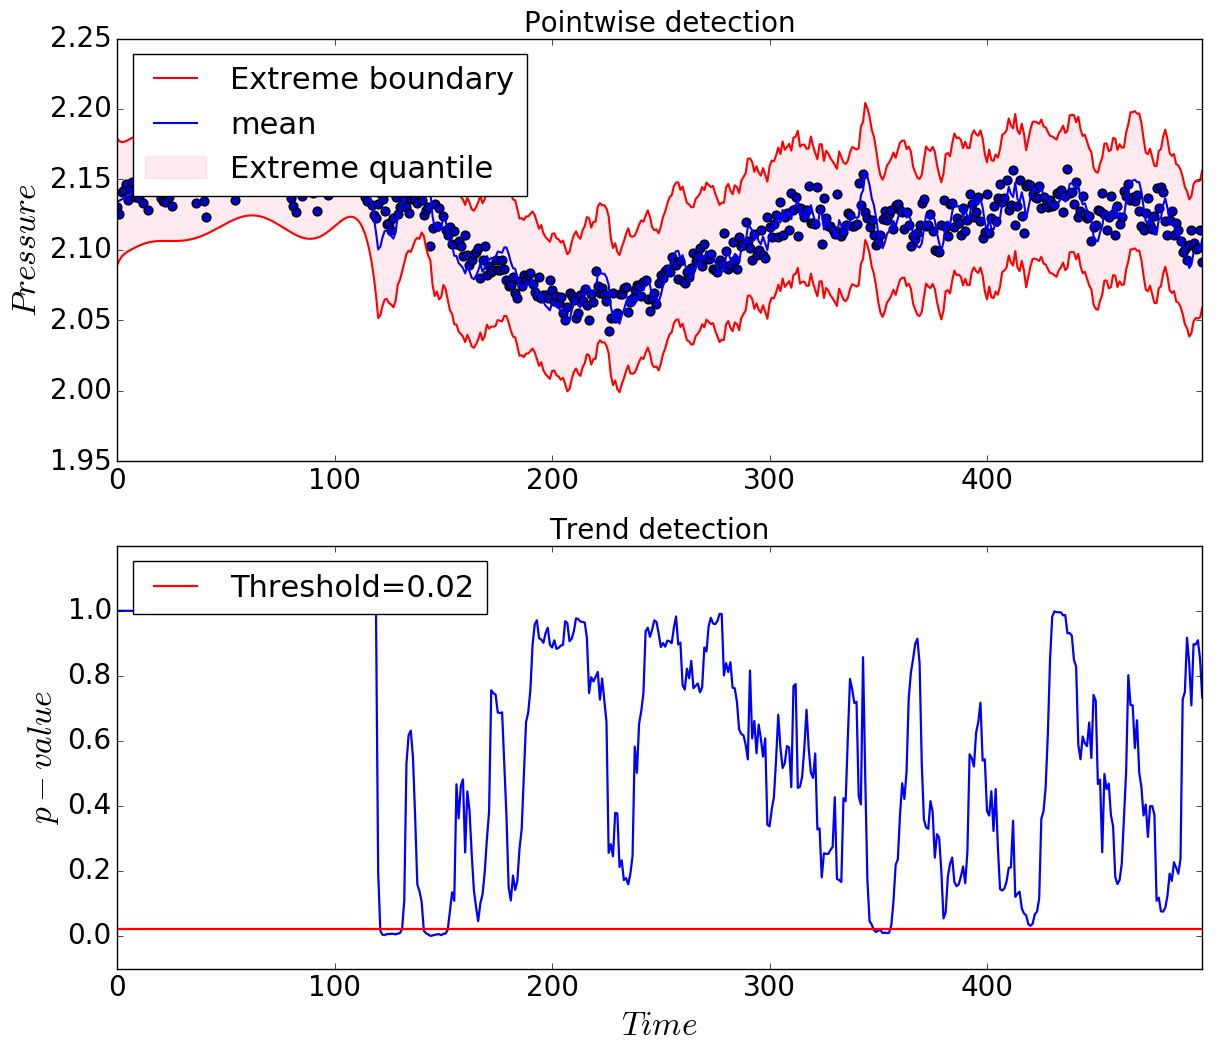

In [13]:
obj.plot(results)

In [8]:
x = np.arange(0,len(Pressure))[:,None]       
mul = GPy.models.GPCoregionalizedRegression([x, x[0:500]], [Flow, Pressure[0:500]], kernel=k[0],likelihoods_list=[k[1].Gaussian_noise_0,k[1].Gaussian_noise_1])
# mul['.*Gaussian_noise_0.variance'].constrain_fixed(k[1].Gaussian_noise_0.variance)
# mul['.*Gaussian_noise_1.variance'].constrain_fixed(k[1].Gaussian_noise_1.variance)

plot_2outputs(mul,[0,900],x_1=Flow,x_2=Pressure)
plt.show()

NameError: name 'k' is not defined